In [171]:
import pandas as pd
import numpy as np
import re 
import datetime as DT
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('project_4_Sadykov_dspr_26.csv') #загпужаем полученный дата сет
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg
28,136266,2.0,1.0,SVO,Moscow,Boeing 737-300,100.0,1566400.0,108.0,14503.703704
80,136900,2.0,3.0,EGO,Belgorod,Sukhoi Superjet-100,51.0,765300.0,97.0,7889.690722
45,136471,1.0,2.0,SVO,Moscow,Boeing 737-300,100.0,1762800.0,120.0,14690.000000
103,136612,2.0,2.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,746400.0,94.0,7940.425532
100,136807,2.0,4.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,531000.0,68.0,7808.823529
99,136802,2.0,7.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,746400.0,96.0,7775.000000
108,136869,1.0,2.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,765300.0,97.0,7889.690722


In [173]:
df.info() #пустые значения это полёты в Новокузнецк, на которые не были проданы билеты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         127 non-null    int64  
 1   month_dep         127 non-null    float64
 2   day_of_week_dep   127 non-null    float64
 3   arrival_airport   127 non-null    object 
 4   city              127 non-null    object 
 5   model             127 non-null    object 
 6   flight_time_min   127 non-null    float64
 7   tot_amnt          118 non-null    float64
 8   pass_count        118 non-null    float64
 9   ticket_coast_avg  118 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 10.0+ KB


In [174]:
df = df.dropna() #удаляем эти строки

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 9 to 126
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         118 non-null    int64  
 1   month_dep         118 non-null    float64
 2   day_of_week_dep   118 non-null    float64
 3   arrival_airport   118 non-null    object 
 4   city              118 non-null    object 
 5   model             118 non-null    object 
 6   flight_time_min   118 non-null    float64
 7   tot_amnt          118 non-null    float64
 8   pass_count        118 non-null    float64
 9   ticket_coast_avg  118 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 10.1+ KB


In [176]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg
77,136827,2.0,6.0,EGO,Belgorod,Sukhoi Superjet-100,51.0,765300.0,97.0,7889.690722
38,136403,2.0,1.0,SVO,Moscow,Boeing 737-300,100.0,1873800.0,129.0,14525.581395
81,136907,1.0,1.0,EGO,Belgorod,Sukhoi Superjet-100,51.0,759000.0,96.0,7906.250000
59,136131,1.0,6.0,SVO,Moscow,Boeing 737-300,99.0,1812800.0,124.0,14619.354839
110,136875,2.0,4.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,765300.0,97.0,7889.690722
15,136322,2.0,1.0,SVO,Moscow,Boeing 737-300,101.0,1567600.0,108.0,14514.814815
11,136383,1.0,3.0,SVO,Moscow,Boeing 737-300,102.0,1493200.0,106.0,14086.792453


In [177]:
df['ticket_coast_avg'] = df['ticket_coast_avg'].apply(lambda x: round(x, -1))

Добавляем данные для расчёта расходов.

In [178]:
# добавляем расход топлива Boeing - 43,3 кг/мин, Сухой - 26,3 кг/мин
#https://www.airlines-inform.ru/commercial-aircraft/boeing-737-300.html
#http://newsruss.ru/doc/index.php/Расход_топлива_самолета
df['fuel_cons'] = df['model']
fuel_cons = {'Sukhoi Superjet-100': 26.3, 'Boeing 737-300': 43.3}
df['fuel_cons'] = df['fuel_cons'].map(fuel_cons)

In [179]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,fuel_cons
125,136951,2.0,4.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,720600.0,90.0,8010.0,26.3
38,136403,2.0,1.0,SVO,Moscow,Boeing 737-300,100.0,1873800.0,129.0,14530.0,43.3
27,136264,2.0,6.0,SVO,Moscow,Boeing 737-300,100.0,1690800.0,116.0,14580.0,43.3
106,136855,1.0,3.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,702300.0,87.0,8070.0,26.3
123,136861,2.0,7.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,689100.0,87.0,7920.0,26.3
48,136436,1.0,4.0,SVO,Moscow,Boeing 737-300,99.0,1811600.0,124.0,14610.0,43.3
69,136605,2.0,3.0,EGO,Belgorod,Sukhoi Superjet-100,51.0,765300.0,97.0,7890.0,26.3


In [180]:
# добавляем максимальную взлётнный вес Boeing - 62,8 тонн, Сухой - 42,5 тонн
#https://www.airlines-inform.ru/commercial-aircraft/boeing-737-300.html
#https://www.airlines-inform.ru/commercial-aircraft/superjet-100.html
df['max_flight_weght'] = df['model']
max_flight_weght = {'Sukhoi Superjet-100': 42.5, 'Boeing 737-300': 62.8}
df['max_flight_weght'] = df['max_flight_weght'].map(max_flight_weght)

In [181]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,fuel_cons,max_flight_weght
89,136672,2.0,5.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,759000.0,96.0,7910.0,26.3,42.5
15,136322,2.0,1.0,SVO,Moscow,Boeing 737-300,101.0,1567600.0,108.0,14510.0,43.3,62.8
61,136130,2.0,1.0,SVO,Moscow,Boeing 737-300,99.0,1556600.0,107.0,14550.0,43.3,62.8
31,136316,1.0,4.0,SVO,Moscow,Boeing 737-300,100.0,1886000.0,130.0,14510.0,43.3,62.8
28,136266,2.0,1.0,SVO,Moscow,Boeing 737-300,100.0,1566400.0,108.0,14500.0,43.3,62.8
32,136320,2.0,7.0,SVO,Moscow,Boeing 737-300,100.0,1544400.0,106.0,14570.0,43.3,62.8
43,136452,2.0,5.0,SVO,Moscow,Boeing 737-300,100.0,1603000.0,109.0,14710.0,43.3,62.8


Добавим денежные показатели, стоиомсть топлива, стоимость сборов и ФОТ.

In [182]:
#Стоимость топлива в Анапе - 53.63 руб/кг, для простоты расчётов будем считать, что все самолёты перед вылетом 
#запралялись в Анапе, стоимость топлаива взята 
#https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7379
#добавляем к времени полёта рулёжку по 10 мин в каждом аэропорту
df['fuel_cons_rub'] = round((df['flight_time_min'] +20) * df['fuel_cons'] * 53.63, 0)

In [183]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,fuel_cons,max_flight_weght,fuel_cons_rub
45,136471,1.0,2.0,SVO,Moscow,Boeing 737-300,100.0,1762800.0,120.0,14690.0,43.3,62.8,278661.0
107,136857,2.0,1.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,765300.0,97.0,7890.0,26.3,42.5,98733.0
37,136389,1.0,3.0,SVO,Moscow,Boeing 737-300,100.0,1873800.0,129.0,14530.0,43.3,62.8,278661.0
111,136888,2.0,2.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,626100.0,79.0,7930.0,26.3,42.5,98733.0
27,136264,2.0,6.0,SVO,Moscow,Boeing 737-300,100.0,1690800.0,116.0,14580.0,43.3,62.8,278661.0
22,136146,2.0,4.0,SVO,Moscow,Boeing 737-300,100.0,1604200.0,109.0,14720.0,43.3,62.8,278661.0
125,136951,2.0,4.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,720600.0,90.0,8010.0,26.3,42.5,97322.0


In [184]:
#аэропортовые сборы:
#https://aaq.aero/upload/iblock/a56/preyskurant_po_aviatsionnoy_deyatelnosti_01.04.2021.pdf - Анапа
#https://www.svo.aero/bitrix/upload/sprint.editor/4a7/4a7ccf195e1ca24895383ebc436d6d0d.pdf - Шереметьево
#https://www.svo.aero/bitrix/upload/sprint.editor/454/454d826b3a157dae0b42b14072cb1367.pdf - Шереметьево
#http://belgorodavia.ru/wp-content/uploads/doc/Прейскурант_с_15.03.21.pdf - Белгород
#из сборов берём 5 услуг - взлёт/посадка; авиационная безопастность; высадка/посадка, трап;
#                           предоставление аэровокзального комплекса; доставка пассажиров до самолёта/аэропорта.
#учитываем, что данные услуги оплачиваются в обоих аэропортах
#Анапа -       540 руб/т.мвм,    502.8 руб/т.мвм, 6360 руб/подача,    86.4 руб/пас,   8070 руб/подача
#Шереметьево - 484.86 руб/т.мвм, 23.87 руб/т.мвм, 2181.6 руб/подача,  158.2 руб/пас,  4257.6 руб/подача
#Белгород -    999.6 руб/т.мвм,  451.2 руб/т.мвм, 9073 руб/подача,    124.8 руб/пасс, 10200 руб/подача

dep_arr = {'SVO': 1024.6, 'EGO': 1539.6}
safety = {'SVO': 526.67, 'EGO': 954}
ladder = {'SVO': 8541.6, 'EGO': 15433}
terminal = {'SVO': 244.6, 'EGO': 211.2}
bus = {'SVO': 12327.6, 'EGO': 18270}

df['dep_arr_cost'] = df['arrival_airport']
df['safety_cost'] = df['arrival_airport']
df['ladder_cost'] = df['arrival_airport']
df['terminal_cost'] = df['arrival_airport']
df['bus_cost'] = df['arrival_airport']

df['ladder_cost'] = df['ladder_cost'].map(ladder)
df['bus_cost'] = df['bus_cost'].map(bus)

df['dep_arr_cost'] = df['dep_arr_cost'].map(dep_arr) * df['max_flight_weght']
df['safety_cost'] = df['safety_cost'].map(safety) * df['max_flight_weght']
df['terminal_cost'] = df['terminal_cost'].map(terminal) * df['pass_count']

In [185]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,fuel_cons,max_flight_weght,fuel_cons_rub,dep_arr_cost,safety_cost,ladder_cost,terminal_cost,bus_cost
111,136888,2.0,2.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,626100.0,79.0,7930.0,26.3,42.5,98733.0,65433.00,40545.000,15433.0,16684.8,18270.0
87,136666,2.0,4.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,664500.0,87.0,7640.0,26.3,42.5,98733.0,65433.00,40545.000,15433.0,18374.4,18270.0
26,136226,1.0,1.0,SVO,Moscow,Boeing 737-300,100.0,1886000.0,130.0,14510.0,43.3,62.8,278661.0,64344.88,33074.876,8541.6,31798.0,12327.6
126,136660,2.0,1.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,677100.0,87.0,7780.0,26.3,42.5,97322.0,65433.00,40545.000,15433.0,18374.4,18270.0
15,136322,2.0,1.0,SVO,Moscow,Boeing 737-300,101.0,1567600.0,108.0,14510.0,43.3,62.8,280984.0,64344.88,33074.876,8541.6,26416.8,12327.6
30,136310,1.0,7.0,SVO,Moscow,Boeing 737-300,100.0,1654200.0,117.0,14140.0,43.3,62.8,278661.0,64344.88,33074.876,8541.6,28618.2,12327.6
124,136754,2.0,1.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,721200.0,90.0,8010.0,26.3,42.5,97322.0,65433.00,40545.000,15433.0,19008.0,18270.0


In [186]:
#https://bricsmagazine.com/ru/articles/ekonomika-poleta - из этой статьи я взял расходы на ФОТ, оплату лизинга
# и стоимость поддержания авиавпарка в рабочем состоянии.
# Я беру приближенные данные, т.к. зарпалата, поддержание авиапарка  и стоимость лизинга сильно отличается
# в зависимости от авиакомпании, а этих данных у нас нет.
df['salary'] = df['tot_amnt']*0.2
df['leasing'] = df['tot_amnt']*0.16
df['repair'] = df['tot_amnt']*0.11
df['other'] = df['tot_amnt']*0.09

In [187]:
#считаем общие затраты на полёт по имеющимся данным
df['total_flight_coast'] = round(df['fuel_cons_rub'] + df['dep_arr_cost'] + df['safety_cost'] +
                                 df['ladder_cost'] + df['terminal_cost'] + df['bus_cost'] + 
                                 df['salary'] + df['leasing'] + df['repair'] + df['other'], 0)

In [188]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,...,dep_arr_cost,safety_cost,ladder_cost,terminal_cost,bus_cost,salary,leasing,repair,other,total_flight_coast
10,136202,1.0,4.0,SVO,Moscow,Boeing 737-300,102.0,1495600.0,100.0,14960.0,...,64344.88,33074.876,8541.6,24460.0,12327.6,299120.0,239296.0,164516.0,134604.0,1263591.0
114,136922,2.0,6.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,607800.0,76.0,8000.0,...,65433.00,40545.000,15433.0,16051.2,18270.0,121560.0,97248.0,66858.0,54702.0,594833.0
25,136215,2.0,2.0,SVO,Moscow,Boeing 737-300,100.0,1664000.0,114.0,14600.0,...,64344.88,33074.876,8541.6,27884.4,12327.6,332800.0,266240.0,183040.0,149760.0,1356674.0
36,136360,2.0,7.0,SVO,Moscow,Boeing 737-300,100.0,1455400.0,97.0,15000.0,...,64344.88,33074.876,8541.6,23726.2,12327.6,291080.0,232864.0,160094.0,130986.0,1235700.0
119,136887,1.0,5.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,595200.0,78.0,7630.0,...,65433.00,40545.000,15433.0,16473.6,18270.0,119040.0,95232.0,65472.0,53568.0,586789.0
47,136172,1.0,7.0,SVO,Moscow,Boeing 737-300,99.0,1617600.0,110.0,14710.0,...,64344.88,33074.876,8541.6,26906.0,12327.6,323520.0,258816.0,177936.0,145584.0,1327390.0
98,136781,1.0,6.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,765300.0,97.0,7890.0,...,65433.00,40545.000,15433.0,20486.4,18270.0,153060.0,122448.0,84183.0,68877.0,687468.0


In [189]:
#считаем оставшуюся прибыль
df['profit'] = df['tot_amnt'] - df['total_flight_coast']

In [190]:
df.sample(7)

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,...,safety_cost,ladder_cost,terminal_cost,bus_cost,salary,leasing,repair,other,total_flight_coast,profit
99,136802,2.0,7.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,746400.0,96.0,7780.0,...,40545.000,15433.0,20275.2,18270.0,149280.0,119424.0,82104.0,67176.0,676673.0,69727.0
45,136471,1.0,2.0,SVO,Moscow,Boeing 737-300,100.0,1762800.0,120.0,14690.0,...,33074.876,8541.6,29352.0,12327.6,352560.0,282048.0,193908.0,158652.0,1413470.0,349330.0
91,136706,1.0,5.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,740100.0,95.0,7790.0,...,40545.000,15433.0,20064.0,18270.0,148020.0,118416.0,81411.0,66609.0,672934.0,67166.0
103,136612,2.0,2.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,746400.0,94.0,7940.0,...,40545.000,15433.0,19852.8,18270.0,149280.0,119424.0,82104.0,67176.0,676251.0,70149.0
101,136630,2.0,6.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,746400.0,94.0,7940.0,...,40545.000,15433.0,19852.8,18270.0,149280.0,119424.0,82104.0,67176.0,676251.0,70149.0
107,136857,2.0,1.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,765300.0,97.0,7890.0,...,40545.000,15433.0,20486.4,18270.0,153060.0,122448.0,84183.0,68877.0,687468.0,77832.0
32,136320,2.0,7.0,SVO,Moscow,Boeing 737-300,100.0,1544400.0,106.0,14570.0,...,33074.876,8541.6,25927.6,12327.6,308880.0,247104.0,169884.0,138996.0,1287742.0,256658.0


In [191]:
#создаём функцию для создания графиков
def graf(i, j, k):
    x = np.arange(len(i))  
    width = 0.35  

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, round(j/1000), width, label='Incom')
    rects2 = ax.bar(x + width/2, round(k/1000), width, label='Сost')

    ax.set_ylabel('1000 rub')
    ax.set_title('Incom/Cost')
    ax.set_xticks(x)
    ax.set_xticklabels(i)
    ax.legend()

    fig.tight_layout()

    plt.show()

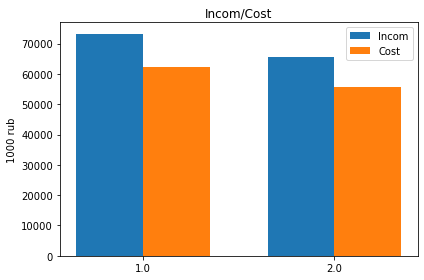

In [192]:
#смотрим общие данные за месяц по доходам и расходам
labels = df['month_dep'].unique()
tot_amnt = df['tot_amnt'].groupby(df['month_dep']).sum()
total_flight_coast = df['total_flight_coast'].groupby(df['month_dep']).sum()

graf(labels, tot_amnt, total_flight_coast)

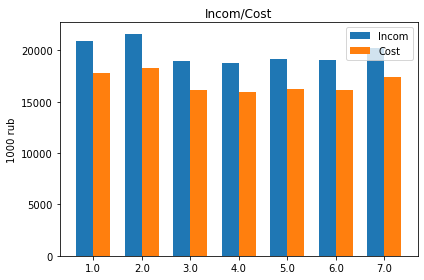

In [193]:
#смотрим общие данные за дням недели по доходам и расходам
labels = np.sort(df['day_of_week_dep'].unique())
tot_amnt = df['tot_amnt'].groupby(df['day_of_week_dep']).sum()
total_flight_coast = df['total_flight_coast'].groupby(df['day_of_week_dep']).sum()

graf(labels, tot_amnt, total_flight_coast)

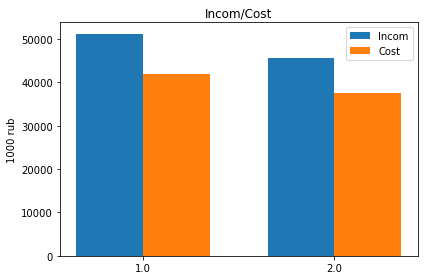

In [194]:
#смотрим общие данные за месяц по доходам и расходам только при использовании Боинга
labels = df[df.model == 'Boeing 737-300']['month_dep'].unique()
tot_amnt = df[df.model == 'Boeing 737-300']['tot_amnt'].groupby(df['month_dep']).sum()
total_flight_coast = df[df.model == 'Boeing 737-300']['total_flight_coast'].groupby(df['month_dep']).sum()

graf(labels, tot_amnt, total_flight_coast)

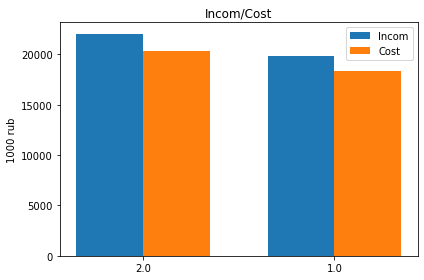

In [195]:
#смотрим общие данные за месяц по доходам и расходам только при использовании Сухого
labels = df[df.model == 'Sukhoi Superjet-100']['month_dep'].unique()
tot_amnt = df[df.model == 'Sukhoi Superjet-100']['tot_amnt'].groupby(df['month_dep']).sum()
total_flight_coast = df[df.model == 'Sukhoi Superjet-100']['total_flight_coast'].groupby(df['month_dep']).sum()

graf(labels, tot_amnt, total_flight_coast)

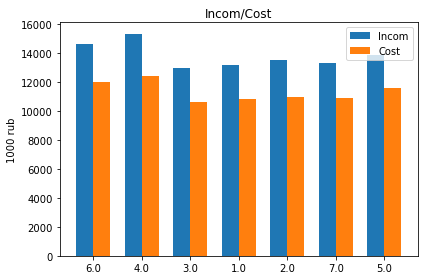

In [198]:
#смотрим общие данные по дням недели по доходам и расходам только при использовании Боинга
labels = df[df.model == 'Boeing 737-300']['day_of_week_dep'].unique()
tot_amnt = df[df.model == 'Boeing 737-300']['tot_amnt'].groupby(df['day_of_week_dep']).sum()
total_flight_coast = df[df.model == 'Boeing 737-300']['total_flight_coast'].groupby(df['day_of_week_dep']).sum()

graf(labels, tot_amnt, total_flight_coast)

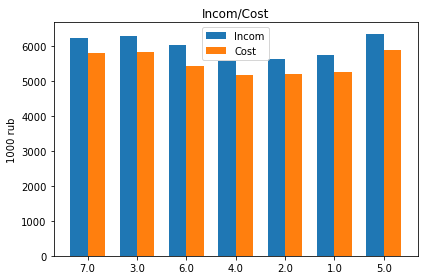

In [199]:
#смотрим общие данные за месяц по доходам и расходам только при использовании Сухого
labels = df[df.model == 'Sukhoi Superjet-100']['day_of_week_dep'].unique()
tot_amnt = df[df.model == 'Sukhoi Superjet-100']['tot_amnt'].groupby(df['day_of_week_dep']).sum()
total_flight_coast = df[df.model == 'Sukhoi Superjet-100']['total_flight_coast'].groupby(df['day_of_week_dep']).sum()

graf(labels, tot_amnt, total_flight_coast)

In [216]:
#смотрим какие рейсы были убыточными за выбранный период
flight_loss = df[df['profit'] < 0]['flight_id']
df2 = df.copy()
df2 = df2[df2['flight_id'].isin(flight_loss)]
df2

,flight_id,month_dep,day_of_week_dep,arrival_airport,city,model,flight_time_min,tot_amnt,pass_count,ticket_coast_avg,...,safety_cost,ladder_cost,terminal_cost,bus_cost,salary,leasing,repair,other,total_flight_coast,profit
100,136807,2.0,4.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,531000.0,68.0,7810.0,...,40545.0,15433.0,14361.6,18270.0,106200.0,84960.0,58410.0,47790.0,550136.0,-19136.0
105,136844,2.0,2.0,EGO,Belgorod,Sukhoi Superjet-100,50.0,575100.0,79.0,7280.0,...,40545.0,15433.0,16684.8,18270.0,115020.0,92016.0,63261.0,51759.0,577155.0,-2055.0
120,136642,1.0,1.0,EGO,Belgorod,Sukhoi Superjet-100,49.0,531000.0,64.0,8300.0,...,40545.0,15433.0,13516.8,18270.0,106200.0,84960.0,58410.0,47790.0,547880.0,-16880.0


Если брать общие данные за весь период, то стоимость купленных билетов окупает расходы на перелёты.
Однако есть 3 рейса которые принесли убыток. Они все совершены на одном типе самодёта в один город, но в разные месяца
и разные дни недели.
Для избежания данный ситуации в будущем я рекомендую пересмотреть либо зимнее расписание в Белгород, либо тип воздушного судна.